# Недвижимость Санкт-Петербурга

Имеется архив объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области. Одна их часть предоставлена пользователями, другая - рассчитана автоматически. Задача - проанализировать данные и ответить на следующие вопросы:
- сколько времени обычно занимает продажа
- какие факторы больше всего влияют на стоимость квартиры: кол-во квадратных метров, числа комнат, удалённость от центра и прочие
- присутствует ли зависимость цены от того, на каком этаже расположена квартира или даты размещения объявления
- где в области самые дешевые и самые дорогие квартиры
- какая область входит в центр Санкт-Петербурга
- отличаются ли факторы ценообразования в центре от всего остального города

### План действий

- [Шаг 1. Загрузка и изучение данных](#1-bullet)
- [Шаг 2. Предобработка данных](#2-bullet)
- [Шаг 3. Расчет новых признаков](#3-bullet)
- [Шаг 4. Исследовательский анализ данных](#4-bullet)
- [Шаг 5. Общий вывод](#5-bullet)

## Шаг 1. Откроем файл с данными и изучим общую информацию <a id='1-bullet'></a>

### Признаки:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20302,9,2700000.0,42.60,2018-03-17T00:00:00,1,2.50,9.0,NaN,9,NaN,False,False,NaN,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,45.0
22707,2,8950000.0,75.50,2018-02-09T00:00:00,2,2.80,20.0,35.0,18,NaN,False,False,16.60,2.0,Санкт-Петербург,39357.0,10581.0,2.0,288.0,3.0,311.0,271.0
1649,10,6000000.0,57.20,2018-04-02T00:00:00,3,2.60,10.0,39.0,4,NaN,False,False,6.20,NaN,Санкт-Петербург,35102.0,12017.0,0.0,NaN,0.0,NaN,282.0
17584,8,8990000.0,77.00,2017-07-10T00:00:00,3,3.00,5.0,53.5,2,NaN,False,False,9.00,0.0,Санкт-Петербург,37996.0,8132.0,0.0,NaN,2.0,185.0,24.0
13542,7,1850000.0,58.00,2015-07-02T00:00:00,3,2.55,5.0,43.3,3,NaN,False,False,6.00,0.0,деревня Зимитицы,NaN,NaN,NaN,NaN,NaN,NaN,610.0
8301,11,3695000.0,35.00,2015-11-16T00:00:00,1,2.60,12.0,NaN,2,NaN,False,False,NaN,NaN,Санкт-Петербург,31520.0,12113.0,0.0,NaN,0.0,NaN,1058.0
12035,6,4350000.0,36.44,2017-07-28T00:00:00,1,NaN,22.0,20.3,16,NaN,False,False,10.02,NaN,Санкт-Петербург,36579.0,9092.0,0.0,NaN,1.0,454.0,146.0
12948,2,14000000.0,90.00,2015-11-22T00:00:00,3,NaN,5.0,58.7,5,False,False,False,9.00,0.0,Санкт-Петербург,23599.0,2408.0,3.0,454.0,1.0,77.0,378.0
2731,0,25000000.0,148.30,2018-04-04T00:00:00,3,NaN,5.0,NaN,5,NaN,False,False,40.20,NaN,Санкт-Петербург,36334.0,14486.0,0.0,NaN,0.0,NaN,NaN
1172,20,3900000.0,40.60,2018-02-11T00:00:00,1,2.79,24.0,16.8,17,False,False,False,14.80,1.0,посёлок Шушары,13461.0,19247.0,0.0,NaN,1.0,351.0,7.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Наблюдается большое число пропущенных данных по отдельным столбцам, но пока не понятно связано ли это с ошибкой или просто рядом с квартирами нет парков, прудов и тд. Кроме того, можно заменить, что  "first_day_exposition" содержит формат object, а не dt. 

## Шаг 2. Предобработка данных <a id='2-bullet'></a>

Изучим пропуски более подробно

In [3]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
ponds_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
first_day_exposition     0.000000
last_price               0.000000
total_area               0.000000
studio                   0.000000
rooms                    0.000000
floor                    0.000000
open_plan                0.000000
total_images             0.000000
dtype: float64

В отдельных столбцах доля пропусков превышает 50%, что несколько настораживает.

Начнем преобразовывать данные по порядку, но сначала займемся столбцами: поменяем названия и выстроим их в более удобоваримый вид

In [4]:
df.columns.values

array(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'], dtype=object)

In [5]:
сolumns = ['total_images', 'last_price', 'total_area_m2', 'first_day_exposition', 'rooms_number', 'ceiling_height_m',
           'floors_number_in_house', 'living_area_m2', 'floor', 'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2',
           'balcony_number', 'locality_name', 'airport_nearest_distance_m', 'city_center_distance_m', 'parks_numbers_within_3km',
           'park_nearest_distance_m', 'ponds_numbers_within_3km', 'pond_nearest_distance_m', 'days_exposition']

df.set_axis(сolumns, axis='columns', inplace=True)
df.columns.values

array(['total_images', 'last_price', 'total_area_m2',
       'first_day_exposition', 'rooms_number', 'ceiling_height_m',
       'floors_number_in_house', 'living_area_m2', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2',
       'balcony_number', 'locality_name', 'airport_nearest_distance_m',
       'city_center_distance_m', 'parks_numbers_within_3km',
       'park_nearest_distance_m', 'ponds_numbers_within_3km',
       'pond_nearest_distance_m', 'days_exposition'], dtype=object)

In [6]:
df = df[[
 'locality_name',
 'rooms_number',
 'last_price',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'balcony_number',
 'floor',
 'floors_number_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',   
 'first_day_exposition',
 'days_exposition',
 'total_images',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'park_nearest_distance_m',
 'ponds_numbers_within_3km',
 'pond_nearest_distance_m',
 'airport_nearest_distance_m'
]]

df.head()

,locality_name,rooms_number,last_price,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony_number,floor,floors_number_in_house,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,total_images,city_center_distance_m,parks_numbers_within_3km,park_nearest_distance_m,ponds_numbers_within_3km,pond_nearest_distance_m,airport_nearest_distance_m
0,Санкт-Петербург,3,13000000.0,108.0,51.0,25.0,2.70,NaN,8,16.0,NaN,False,False,2019-03-07T00:00:00,NaN,20,16028.0,1.0,482.0,2.0,755.0,18863.0
1,посёлок Шушары,1,3350000.0,40.4,18.6,11.0,NaN,2.0,1,11.0,NaN,False,False,2018-12-04T00:00:00,81.0,7,18603.0,0.0,NaN,0.0,NaN,12817.0
2,Санкт-Петербург,2,5196000.0,56.0,34.3,8.3,NaN,0.0,4,5.0,NaN,False,False,2015-08-20T00:00:00,558.0,10,13933.0,1.0,90.0,2.0,574.0,21741.0
3,Санкт-Петербург,3,64900000.0,159.0,NaN,NaN,NaN,0.0,9,14.0,NaN,False,False,2015-07-24T00:00:00,424.0,0,6800.0,2.0,84.0,3.0,234.0,28098.0
4,Санкт-Петербург,2,10000000.0,100.0,32.0,41.0,3.03,NaN,13,14.0,NaN,False,False,2018-06-19T00:00:00,121.0,2,8098.0,2.0,112.0,1.0,48.0,31856.0


In [7]:
# Пока дубликатов нет

df.duplicated().sum()

0

### locality_name

In [8]:
df.locality_name = df.locality_name.str.lower()

In [9]:
# Попробуем заменить ё на е, чтобы привести одинаковые локации к одной форме записи
print('До замены: {}'.format(len(df.locality_name.unique())))
df.locality_name = df.locality_name.replace('ё', 'е', regex=True)
print('После замены: {}'.format(len(df.locality_name.unique())))

До замены: 365
После замены: 331


In [10]:
print('Кол-во пропущенных значений в столбце: {}'.format(df.locality_name.isnull().sum()))
print('Доля пропусков в столбце: {:.2%}'.format(df.locality_name.isnull().sum()/df.shape[0]))

Кол-во пропущенных значений в столбце: 49
Доля пропусков в столбце: 0.21%


In [11]:
# В отсутствии информации о местоположении квартиры данные будут бесполезны, да и их кол-во достаточно мало - удаляем

df = df.dropna(subset=['locality_name'])
df.locality_name.isnull().sum()

0

### living_area_m2 и kitchen_area_m2

Поверхностного анализа было достаточно, чтобы понять: total_area_m2 != living_area_m2 + kitchen_area_m2

У нас не учитывается, как минимум, размер санузла. Поэтому посчитаем процентное соотношение данных помещений к общему размеру.

Перед этим посмотрим, а есть ли квартиры, где total_area_m2 меньше суммы living_area_m2 и kitchen_area_m2

In [12]:
# Таким 64 штуки - будем удалять эти данные когда приведем в порядок все задействованные столбцы

print(len(df.query('total_area_m2 < (living_area_m2+kitchen_area_m2)')))

64


In [13]:
print('Доля жилой площади: {:.2%}'.format((df['living_area_m2'] / df['total_area_m2']).median()))
print('Доля кухни: {:.2%}'.format((df['kitchen_area_m2'] / df['total_area_m2']).median()))

Доля жилой площади: 56.79%
Доля кухни: 17.24%


In [14]:
df['living_area_m2'] = df['living_area_m2'].fillna(df['total_area_m2'] * 0.56)
df['kitchen_area_m2'] = df['kitchen_area_m2'].fillna(df['total_area_m2'] * 0.17)          

In [15]:
# Проверим

print('Кол-во пропусков в столбце living_area_m2: {}'.format(df.living_area_m2.isnull().sum()))
print('Кол-во пропусков в столбце kitchen_area_m2: {}'.format(df.kitchen_area_m2.isnull().sum()))

Кол-во пропусков в столбце living_area_m2: 0
Кол-во пропусков в столбце kitchen_area_m2: 0


In [16]:
print('Кол-во аномальных значений: {:.2f}'.
      format((len(df.query('total_area_m2 < (living_area_m2+kitchen_area_m2)')))))
print('Доля аномальных значений: {:.2%}'.
      format((len(df.query('total_area_m2 < (living_area_m2+kitchen_area_m2)')))/df.shape[0]))

Кол-во аномальных значений: 115.00
Доля аномальных значений: 0.49%


In [17]:
# Аномальных значений стало больше, но не критично - они нам все также не нужны
df = df.query('total_area_m2 > (living_area_m2+kitchen_area_m2)')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23465 entries, 0 to 23698
Data columns (total 22 columns):
locality_name                 23465 non-null object
rooms_number                  23465 non-null int64
last_price                    23465 non-null float64
total_area_m2                 23465 non-null float64
living_area_m2                23465 non-null float64
kitchen_area_m2               23465 non-null float64
ceiling_height_m              14384 non-null float64
balcony_number                12031 non-null float64
floor                         23465 non-null int64
floors_number_in_house        23380 non-null float64
is_apartment                  2728 non-null object
is_studio                     23465 non-null bool
is_open_plan                  23465 non-null bool
first_day_exposition          23465 non-null object
days_exposition               20305 non-null float64
total_images                  23465 non-null int64
city_center_distance_m        18016 non-null float64
parks_

### is_apartment

Предположим, что пропуски возникли из-за того, что владельцы "обычных" квартир решили оставить данное поле незаполненным. Кроме того, это вполне вписывается в реалии рынка недвижимости. Объем предлоения апартаментов остается незначительным: по оценке агенства "Метриум", на этот класс жилья пришлось всего 8% от общего числа сделок в 2019 году.

In [19]:
df.is_apartment.unique()

array([nan, False, True], dtype=object)

In [20]:
df.is_apartment.isnull().sum()

20737

In [21]:
df.is_apartment = df.is_apartment.fillna('False')
df.is_apartment.isnull().sum()

0

### balcony_number, parks_numbers_within_3km, ponds_numbers_within_3km

Поступим аналогичным образом и с данными столбцами - если значения в них отсутствуют, то, скорее всего, указывать было нечего

In [22]:
print(df['balcony_number'].unique())
print(df['parks_numbers_within_3km'].unique())
print(df['ponds_numbers_within_3km'].unique())

[nan  2.  0.  1.  5.  4.  3.]
[ 1.  0.  2. nan  3.]
[ 2.  0.  3.  1. nan]


In [23]:
df['balcony_number'] = df['balcony_number'].fillna(0)
df['parks_numbers_within_3km'] = df['parks_numbers_within_3km'].fillna(0)
df['ponds_numbers_within_3km'] = df['ponds_numbers_within_3km'].fillna(0)

### rooms_number

Присутствуют квартиры с кол-вом комнат равным нулю - надо разобраться

In [24]:
print('Кол-во квартир, где число комнат равно нулю: {}'.format(df[df['rooms_number'] == 0]['rooms_number'].count()))
print('Кол-во квартир-студий, где число комнат равно нулю: {}'
      .format(df[(df['rooms_number'] == 0) & (df['is_studio'] == True)]['rooms_number'].count()))

Кол-во квартир, где число комнат равно нулю: 180
Кол-во квартир-студий, где число комнат равно нулю: 126


In [25]:
# Доля комнат с нулевым кол-вом квартир небольшая, но удалять не хочется 

print('Доля "нулевых" квартир: {:.2%}'.format(df[df['rooms_number'] == 0]['rooms_number'].count()/df.shape[0]))

Доля "нулевых" квартир: 0.77%


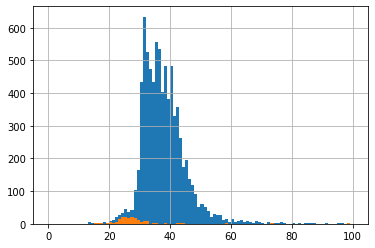

In [26]:
for_hist = df.query('rooms_number == 0')
for_hist2 = df.query('rooms_number == 1')

for_hist2['total_area_m2'].hist(bins=100, range=(0, 100))
for_hist['total_area_m2'].hist(bins=100, range=(0, 100))

In [27]:
<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Не забывай подписывать оси на графиках и сам график, иначе не залазя в код абсолютно не понятно, что изображеноprint('Медиана 0 комнатной квартиры: ', df[df['rooms_number'] == 0]['total_area_m2'].median())
print('Медиана 1 комнатной квартиры: ', df[df['rooms_number'] == 1]['total_area_m2'].median())

Медиана 0 комнатной квартиры:  26.165
Медиана 1 комнатной квартиры:  36.6


In [28]:
# Число подобных квартир вне Санк-Петербурга

for_hist.query('locality_name != "санкт-петербург"')['locality_name'].count()

82

In [29]:
# Число предполагаемых деревенских домов вне Санк-Петербурга

for_hist[(for_hist['locality_name'] != "санкт-петербург") & (for_hist['floor'] == 1)]['locality_name'].count()

6

Площадь данных квартир действительно в среднем меньше, чем однушек. Большая часть их них точно относится к студиям, а остальные могут представлять собой деревенские дома. Пока оставим эти записи

### floors_number_in_house

In [30]:
# Их мало - удаляем

print('Доля "нулевых" квартир: {:.2%}'.format(df.floors_number_in_house.isnull().sum()/df.shape[0]))

Доля "нулевых" квартир: 0.36%


In [31]:
df.dropna(subset = ['floors_number_in_house'], inplace = True)
df.floors_number_in_house.isnull().sum()

0

### ceiling_height_m

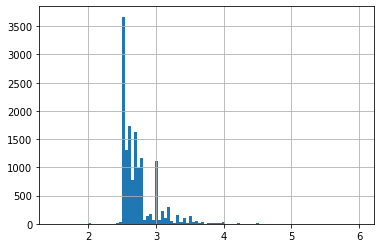

In [32]:
df['ceiling_height_m'].hist(bins=100, range=(1.5, 6))

In [33]:
# Заменяем на медианные значения

df.ceiling_height_m = df.ceiling_height_m.fillna(df.ceiling_height_m.median())

### days_exposition

Нам нужно анализировать среднее время продажи квартиры, а значит строки, где отсутствует информация о "сколько дней было размещено объявление (от публикации до снятия)", нам не нужны. Но их 13% от выборки. Пока оставим как есть.

Схожая ситуация и с **city_center_distance_m**: пропущенные значения бесполезны, но их еще больше. Пересечений почти нет. Пока оставим. Будем удалять для точечных расчетов по необходимости - потеря такого объема данных может повлиять на общую картину.

In [34]:
print('Доля пропусков в столбце: {:.2%}'.format(df.days_exposition.isnull().sum()/df.shape[0]))
print('Доля пропусков в столбце: {:.2%}'.format(df.city_center_distance_m.isnull().sum()/df.shape[0]))

Доля пропусков в столбце: 13.48%
Доля пропусков в столбце: 23.26%


In [35]:
print('Кол-во пропусков в столбце days_exposition: {}'.format(df.days_exposition.isnull().sum()))
print('Кол-во пропусков в столбце city_center_distance_m: {}'.format(df.city_center_distance_m.isnull().sum()))
df[(df['days_exposition'].isnull()) & (df['city_center_distance_m'].isnull())]['locality_name'].count()

Кол-во пропусков в столбце days_exposition: 3151
Кол-во пропусков в столбце city_center_distance_m: 5439


860

### Изменим типы данных там где необходимо

In [36]:
# Менять float64 в столбцах, где указаны метры не будем - точность понадобится для будущих расчетов

df['balcony_number'] = df['balcony_number'].astype('int')
df['floors_number_in_house'] = df['floors_number_in_house'].astype('int')

# Для операций с булевыми значениями надо привести их к этому типу везде

df['is_apartment'] = df['is_apartment'].astype('bool')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23380 entries, 0 to 23698
Data columns (total 22 columns):
locality_name                 23380 non-null object
rooms_number                  23380 non-null int64
last_price                    23380 non-null float64
total_area_m2                 23380 non-null float64
living_area_m2                23380 non-null float64
kitchen_area_m2               23380 non-null float64
ceiling_height_m              23380 non-null float64
balcony_number                23380 non-null int64
floor                         23380 non-null int64
floors_number_in_house        23380 non-null int64
is_apartment                  23380 non-null bool
is_studio                     23380 non-null bool
is_open_plan                  23380 non-null bool
first_day_exposition          23380 non-null object
days_exposition               20229 non-null float64
total_images                  23380 non-null int64
city_center_distance_m        17941 non-null float64
parks_numbe

## Шаг 3. Посчитаем и добавим в таблицу новые признаки <a id='3-bullet'></a>

In [38]:
# Добавим цену квадратного метра

df['price_per_m2'] = round(df['last_price'] / df['total_area_m2'], 2)

In [39]:
# Добавим день недели, месяц и год публикации объявления

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['week_day'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].dt.year

In [40]:
# Добавим этаж квартиры; варианты — первый, последний, другой;

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_number_in_house']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_category'] = df.apply(floor_category, axis=1)

In [41]:
# Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей

df['total_living_ratio'] = df['living_area_m2'] / df['total_area_m2']
df['total_kitchen_ratio'] = df['kitchen_area_m2'] / df['total_area_m2']

In [42]:
df.head()

,locality_name,rooms_number,last_price,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony_number,floor,floors_number_in_house,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,total_images,city_center_distance_m,parks_numbers_within_3km,park_nearest_distance_m,ponds_numbers_within_3km,pond_nearest_distance_m,airport_nearest_distance_m,price_per_m2,week_day,month,year,floor_category,total_living_ratio,total_kitchen_ratio
0,санкт-петербург,3,13000000.0,108.0,51.00,25.00,2.70,0,8,16,True,False,False,2019-03-07,NaN,20,16028.0,1.0,482.0,2.0,755.0,18863.0,120370.37,Thursday,March,2019,другой,0.472222,0.231481
1,поселок шушары,1,3350000.0,40.4,18.60,11.00,2.65,2,1,11,True,False,False,2018-12-04,81.0,7,18603.0,0.0,NaN,0.0,NaN,12817.0,82920.79,Tuesday,December,2018,первый,0.460396,0.272277
2,санкт-петербург,2,5196000.0,56.0,34.30,8.30,2.65,0,4,5,True,False,False,2015-08-20,558.0,10,13933.0,1.0,90.0,2.0,574.0,21741.0,92785.71,Thursday,August,2015,другой,0.612500,0.148214
3,санкт-петербург,3,64900000.0,159.0,89.04,27.03,2.65,0,9,14,True,False,False,2015-07-24,424.0,0,6800.0,2.0,84.0,3.0,234.0,28098.0,408176.10,Friday,July,2015,другой,0.560000,0.170000
4,санкт-петербург,2,10000000.0,100.0,32.00,41.00,3.03,0,13,14,True,False,False,2018-06-19,121.0,2,8098.0,2.0,112.0,1.0,48.0,31856.0,100000.00,Tuesday,June,2018,другой,0.320000,0.410000


## Шаг 4. Проведем исследовательский анализ данных <a id='4-bullet'></a>

**Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.**

13.0
900.0
Доля редких значений: 0.96%


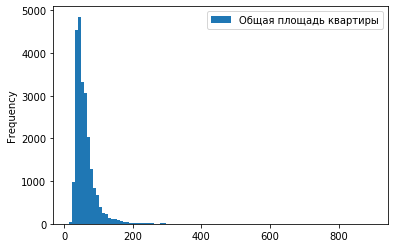

In [43]:
# Общая площадь квартиры

print(df.total_area_m2.min())
print(df.total_area_m2.max())
print('Доля редких значений: {:.2%}'.format(df.query('total_area_m2 > 200')['total_area_m2'].count()/df.shape[0]))

df.total_area_m2.plot(kind='hist', label='Общая площадь квартиры', legend=True, bins=100)

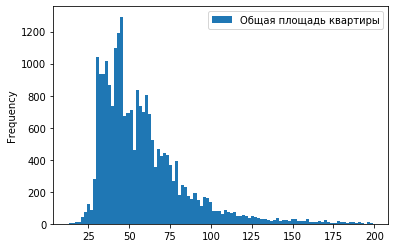

In [44]:
# Уберем слишком редкие значения

df_new = df.query('total_area_m2 < 200')
df_new.total_area_m2.plot(kind='hist', label='Общая площадь квартиры', legend=True, bins=100)

12190.0
330000000.0


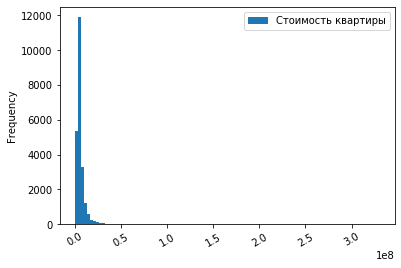

In [45]:
# Стоимость квартиры

print(df_new.last_price.min())
print(df_new.last_price.max())

df_new.last_price.plot(kind='hist', label='Стоимость квартиры', rot=30, legend=True, bins=100)

Доля редких значений: 0.36%


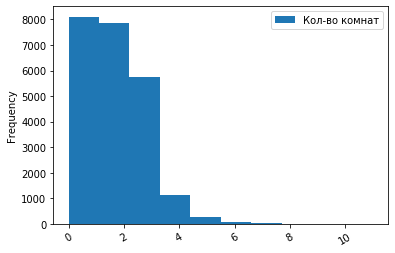

In [46]:
# Кол-во комнат

print('Доля редких значений: {:.2%}'.format(df_new.query(' rooms_number > 5')['rooms_number'].count()/df.shape[0]))

df_new.rooms_number.plot(kind='hist', label='Кол-во комнат', rot=30, legend=True)

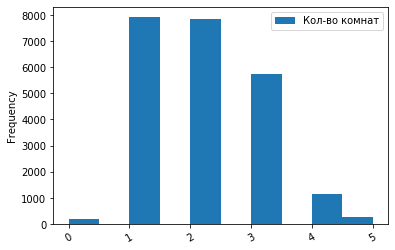

In [47]:
# Уберем лишние значения

df_new = df_new.query('rooms_number < 6')

df_new.rooms_number.plot(kind='hist', label='Кол-во комнат', rot=30, legend=True)

1.0
32.0
Доля редких значений: 0.24%


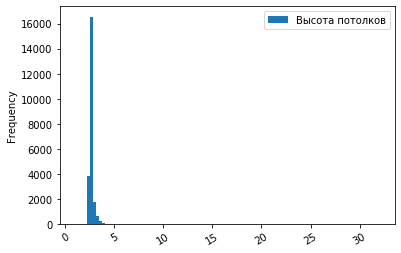

In [48]:
# высота потолков

print(df_new.ceiling_height_m.min())
print(df_new.ceiling_height_m.max())
print('Доля редких значений: {:.2%}'
      .format(df_new.query('2 < ceiling_height_m > 4')['ceiling_height_m'].count()/df.shape[0]))

df_new.ceiling_height_m.plot(kind='hist', label='Высота потолков', rot=30, legend=True, bins=100)

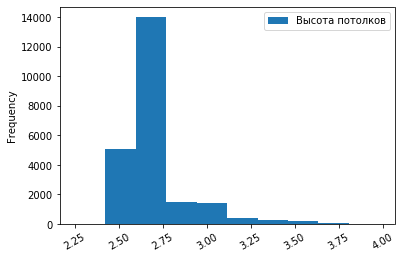

In [49]:
# Уберем лишние значения

df_new = df_new.query('2 < ceiling_height_m < 4')

df_new.ceiling_height_m.plot(kind='hist', label='Высота потолков', rot=30, legend=True)

В изученных данных было большое число выбросов, которые мешали визуальному анализу, и явно могли негативно повлиять на будущие расчеты. Теперь графики стали более наглядными



**Изучим время продажи квартиры. Опишим, сколько обычно занимает продажа. И ответим на вопрос "когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"**

Кол-во пропусков в столбце days_exposition: 3045
Кол-во пропусков в столбце days_exposition после удаления: 0

Среднее время продажи квартиры: 179.50
Медианное время продажи квартиры: 95.00

count    19922.000000
mean       179.499699
std        218.315509
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


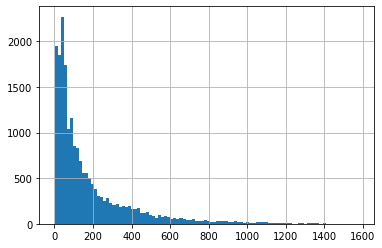

In [50]:
# Вспомним, что у нас было большое число пропусков в данных, которые мы не стали сразу удалять
# Создадим специальную выборку без пропусков для ответа на вопросы

print('Кол-во пропусков в столбце days_exposition: {}'.format(df_new.days_exposition.isnull().sum()))

df_days_expo = df_new.dropna(subset=['days_exposition'])
print('Кол-во пропусков в столбце days_exposition после удаления: {}'.format(df_days_expo.days_exposition.isnull().sum()))
print('')
print('Среднее время продажи квартиры: {:.2f}'.format(df_days_expo.days_exposition.mean()))
print('Медианное время продажи квартиры: {:.2f}'.format(df_days_expo.days_exposition.median()))
print('')
print(df_days_expo.days_exposition.describe())

df_days_expo.days_exposition.hist(bins=100)

В большинстве случаев квартиры пролдаются за 229 дней, что сходится с доступной статистикой: согласно данным "Яндекс", в 2018 году средний срок продажи квартиры в Санк-Петербурге составил 7,5 месяцев. Если верить Сбербанку, то средний срок продажи по городу составил 68 дней в первом полугодии 2019 года. 

Продажу можно считать очень быстрой если продавец уложился в 45 дней, а необычно долгой если объявление висело дольше двух лет

#### Нас интересует - какие факторы больше всего влияют на стоимость квартиры. Зависит ли цена от квадратного метра, числа комнат, удалённости от центра? Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом? Присутствует ли зависимость от даты размещения: дня недели, месяца и года?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ec83a3810>,
      dtype=object)

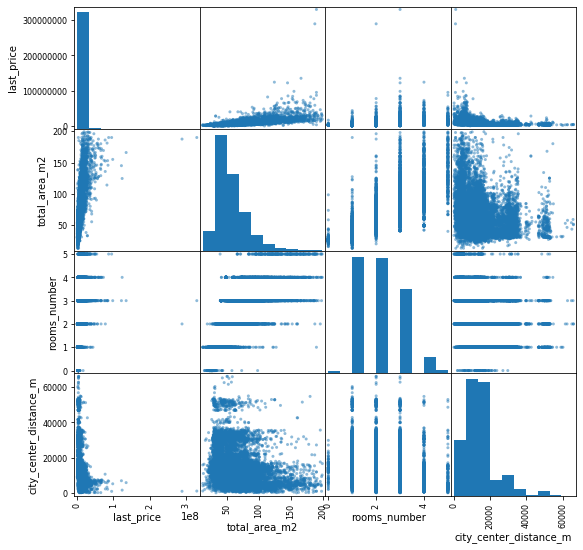

In [51]:
# Построим матрицу рассеяния

pd.plotting.scatter_matrix(df_new[['last_price', 'total_area_m2', 'rooms_number', 'city_center_distance_m']], figsize=(9, 9))

Результат ожидаемый: 
- чем больше квартира, тем дороже она стоит
- чем больше комнат, тем она дороже, но есть любопытный нюанс: ценовой пик достигается на трехкомнатной квартире и при дальнейшем росте комнат стоимость жилья снижается. Квартиры с 1, 2 и 3 комнатами чаще находятся ближе к центру города, тогда как с 0, 4 и 5 комнатами дальше. Судя по всему, это также влияет на ценообразование
- Чем ближе квартира находится к центру, тем дороже она стоит

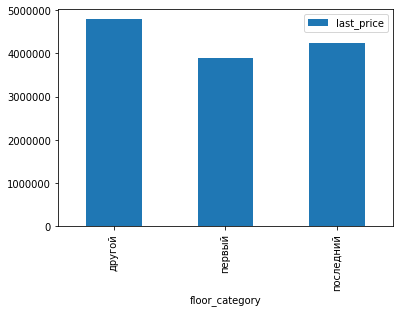

In [52]:
(df_new
    .pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(y='last_price', kind='bar')
)

Люди предпочитают не покупать квартиры на первых или последних этажах, что оказывает свое влияние на ценообразование:
- квартиры на первом этаже самые дешевые
- следом идет жилье на последнем этаже
- самые дорогие квартиры находятся в промежутке

На самом деле интересно посмотреть на разницу в стоимости квадратного метра (раз уж мы добавили такой столбец)

In [53]:
df_new.head()

,locality_name,rooms_number,last_price,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony_number,floor,floors_number_in_house,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,total_images,city_center_distance_m,parks_numbers_within_3km,park_nearest_distance_m,ponds_numbers_within_3km,pond_nearest_distance_m,airport_nearest_distance_m,price_per_m2,week_day,month,year,floor_category,total_living_ratio,total_kitchen_ratio
0,санкт-петербург,3,13000000.0,108.0,51.00,25.00,2.70,0,8,16,True,False,False,2019-03-07,NaN,20,16028.0,1.0,482.0,2.0,755.0,18863.0,120370.37,Thursday,March,2019,другой,0.472222,0.231481
1,поселок шушары,1,3350000.0,40.4,18.60,11.00,2.65,2,1,11,True,False,False,2018-12-04,81.0,7,18603.0,0.0,NaN,0.0,NaN,12817.0,82920.79,Tuesday,December,2018,первый,0.460396,0.272277
2,санкт-петербург,2,5196000.0,56.0,34.30,8.30,2.65,0,4,5,True,False,False,2015-08-20,558.0,10,13933.0,1.0,90.0,2.0,574.0,21741.0,92785.71,Thursday,August,2015,другой,0.612500,0.148214
3,санкт-петербург,3,64900000.0,159.0,89.04,27.03,2.65,0,9,14,True,False,False,2015-07-24,424.0,0,6800.0,2.0,84.0,3.0,234.0,28098.0,408176.10,Friday,July,2015,другой,0.560000,0.170000
4,санкт-петербург,2,10000000.0,100.0,32.00,41.00,3.03,0,13,14,True,False,False,2018-06-19,121.0,2,8098.0,2.0,112.0,1.0,48.0,31856.0,100000.00,Tuesday,June,2018,другой,0.320000,0.410000


In [54]:
df_new.pivot_table(index='floor_category', values='price_per_m2', aggfunc='median')

,price_per_m2
floor_category,
другой,98100.635
первый,81010.980
последний,87053.570


В среднем стоимость квадратного метр на первом этаже ниже "промежуточного" на 17 000 рублей - довольно существенная разница

(0, 220000)

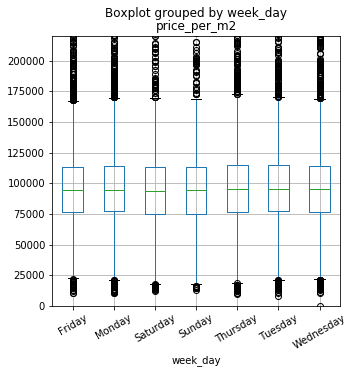

In [55]:
# Думаю, что заказчикам приятно смотреть на разные красивые графики - используем boxplot

df.boxplot('price_per_m2', by='week_day', rot=30, figsize=(5,5)).set_ylim(0,220000)

(0, 220000)

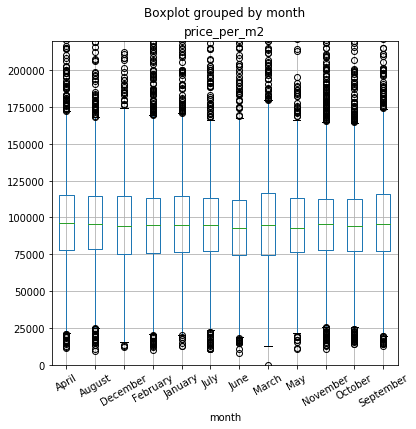

In [56]:
df.boxplot('price_per_m2', by='month', rot=30, figsize=(6,6)).set_ylim(0,220000)

(0, 200000)

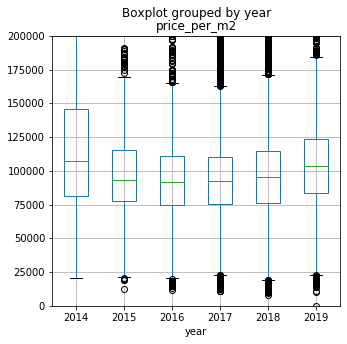

In [57]:
df.boxplot('price_per_m2', by='year', figsize=(5,5)).set_ylim(0,200000)

Ощутимая зависимость цены от дня недели или месяца отсутствует. Разве что летом жилье несущественно дешевеет.

При этом, на последнем графике (зависимость от года размещения) можно проследить определенную закономерность. В 2014 году курс рубля к доллару снизился на 65%, что привело к пересчету долларовой стоимости на жилье - его, как минимум, пытались продать дороже. Затем, после того как паника несколько утихла, цены вернулись в некое равновесное состояни, ведь население, имеющее доходы в рублях, явно не стало богаче, а значит и продать ему жилье с наценкой стало сложнее. В 2019 году инфляция достигла многолетних минимумов, а реальные доходы начали расти. В результате чего увеличились и цены не недвижимость.

#### Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. Нас интересуют населённые пункты с самой высокой и низкой стоимостью жилья.

In [58]:
# Сортируем по кол-во объявлений

df_locality_price = (
    df_new
    .pivot_table(index='locality_name', values ='price_per_m2', aggfunc='count')
    .sort_values(by = 'price_per_m2', ascending = False)
    .head(10)
)

df_locality_price

,price_per_m2
locality_name,
санкт-петербург,15174
поселок мурино,538
поселок шушары,438
всеволожск,387
пушкин,360
колпино,336
поселок парголово,325
гатчина,301
деревня кудрово,295


In [59]:
# К новому датасету добавляем данные по стоимости квадратного метра

df_locality_price = df_new.query('locality_name in @df_locality_price.index.tolist()')

print(df_locality_price.locality_name.unique())
df_locality_price

['санкт-петербург' 'поселок шушары' 'поселок парголово' 'поселок мурино'
 'пушкин' 'деревня кудрово' 'колпино' 'гатчина' 'выборг' 'всеволожск']


,locality_name,rooms_number,last_price,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony_number,floor,floors_number_in_house,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,total_images,city_center_distance_m,parks_numbers_within_3km,park_nearest_distance_m,ponds_numbers_within_3km,pond_nearest_distance_m,airport_nearest_distance_m,price_per_m2,week_day,month,year,floor_category,total_living_ratio,total_kitchen_ratio
0,санкт-петербург,3,13000000.0,108.00,51.00,25.00,2.70,0,8,16,True,False,False,2019-03-07,NaN,20,16028.0,1.0,482.0,2.0,755.0,18863.0,120370.37,Thursday,March,2019,другой,0.472222,0.231481
1,поселок шушары,1,3350000.0,40.40,18.60,11.00,2.65,2,1,11,True,False,False,2018-12-04,81.0,7,18603.0,0.0,NaN,0.0,NaN,12817.0,82920.79,Tuesday,December,2018,первый,0.460396,0.272277
2,санкт-петербург,2,5196000.0,56.00,34.30,8.30,2.65,0,4,5,True,False,False,2015-08-20,558.0,10,13933.0,1.0,90.0,2.0,574.0,21741.0,92785.71,Thursday,August,2015,другой,0.612500,0.148214
3,санкт-петербург,3,64900000.0,159.00,89.04,27.03,2.65,0,9,14,True,False,False,2015-07-24,424.0,0,6800.0,2.0,84.0,3.0,234.0,28098.0,408176.10,Friday,July,2015,другой,0.560000,0.170000
4,санкт-петербург,2,10000000.0,100.00,32.00,41.00,3.03,0,13,14,True,False,False,2018-06-19,121.0,2,8098.0,2.0,112.0,1.0,48.0,31856.0,100000.00,Tuesday,June,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,санкт-петербург,1,3550000.0,35.30,16.30,9.10,2.86,2,4,15,True,False,False,2018-02-28,29.0,13,16081.0,1.0,353.0,2.0,652.0,17284.0,100566.57,Wednesday,February,2018,другой,0.461756,0.257790
23690,санкт-петербург,2,5500000.0,52.00,31.00,6.00,2.65,0,2,5,True,False,False,2018-07-19,15.0,3,6263.0,1.0,300.0,0.0,NaN,20151.0,105769.23,Thursday,July,2018,другой,0.596154,0.115385
23691,санкт-петербург,2,9470000.0,72.90,40.30,10.60,2.75,1,7,25,True,False,False,2016-10-13,519.0,11,4489.0,0.0,NaN,1.0,806.0,19424.0,129903.98,Thursday,October,2016,другой,0.552812,0.145405
23694,санкт-петербург,3,9700000.0,133.81,73.30,13.83,3.70,0,3,5,True,False,False,2017-03-21,NaN,9,4232.0,1.0,796.0,3.0,381.0,24665.0,72490.85,Tuesday,March,2017,другой,0.547792,0.103356


In [60]:
(
df_locality_price
    .pivot_table(index='locality_name', values ='price_per_m2', aggfunc='median')
    .sort_values(by = 'price_per_m2', ascending = False)
)

,price_per_m2
locality_name,
санкт-петербург,104545.450
пушкин,99993.590
деревня кудрово,91860.470
поселок парголово,91642.860
поселок мурино,85697.395
поселок шушары,76747.970
колпино,74723.745
гатчина,67695.960
всеволожск,65686.270


Первое место по стоимости квадратного метра занимает Санкт-Петербург, второе - туристический Пушкин, несмотря на то, что находится дальше от Санкт-Петербурга, чем многие другие населенные пункты из списка, где находится большое число многоэтажек. Выборг находится примерно в 140 км от Северной столицы и поэтому квадратный метр там стоит дешевле всего.

#### Выясним, какая область входит в центр Санкт-Петербурга. Для этого создадим столбец с расстоянием до центра в километрах, округлив до целых значений. После этого посчитаем среднюю цену для каждого километра. Затем построим график, который показывает, как цена зависит от удалённости от центра. Граница, где график сильно меняется и будет центральной зоной.

Кол-во пропусков в столбце city_center_distance_m: 5406
Кол-во пропусков в столбце city_center_distance_m после удаления: 0
count    17561.000000
mean     14357.629064
std       8582.257420
min        181.000000
25%       9551.000000
50%      13203.000000
75%      16376.000000
max      65968.000000
Name: city_center_distance_m, dtype: float64


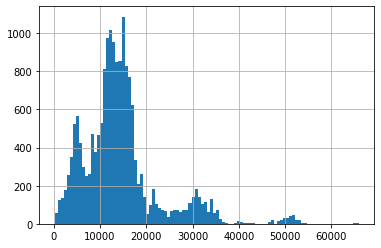

In [61]:
# В столбце "city_center_distance_m" бло много пропусков. Удалим их сейчас. Заполнять их нет смысла - угадывая 
# легко можно ошибиться

print('Кол-во пропусков в столбце city_center_distance_m: {}'.format(df_new.city_center_distance_m.isnull().sum()))

df_new = df_new.dropna(subset=['city_center_distance_m'])
print('Кол-во пропусков в столбце city_center_distance_m после удаления: {}'.format(df_new.city_center_distance_m.isnull().sum()))

print(df_new.city_center_distance_m.describe())

df_new.city_center_distance_m.hist(bins=100)

In [62]:
df_new['city_center_distance_m'].isnull().sum()

0

In [63]:
df_new['city_center_distance_km'] = df_new['city_center_distance_m'] / 1000

In [64]:
df_new['city_center_distance_km'].isnull().sum()

0

In [65]:
df_new['mean_price_per_km'] = df_new['last_price'] / df_new['city_center_distance_km']
df_new.head()

,locality_name,rooms_number,last_price,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony_number,floor,floors_number_in_house,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,total_images,city_center_distance_m,parks_numbers_within_3km,park_nearest_distance_m,ponds_numbers_within_3km,pond_nearest_distance_m,airport_nearest_distance_m,price_per_m2,week_day,month,year,floor_category,total_living_ratio,total_kitchen_ratio,city_center_distance_km,mean_price_per_km
0,санкт-петербург,3,13000000.0,108.0,51.00,25.00,2.70,0,8,16,True,False,False,2019-03-07,NaN,20,16028.0,1.0,482.0,2.0,755.0,18863.0,120370.37,Thursday,March,2019,другой,0.472222,0.231481,16.028,8.110806e+05
1,поселок шушары,1,3350000.0,40.4,18.60,11.00,2.65,2,1,11,True,False,False,2018-12-04,81.0,7,18603.0,0.0,NaN,0.0,NaN,12817.0,82920.79,Tuesday,December,2018,первый,0.460396,0.272277,18.603,1.800785e+05
2,санкт-петербург,2,5196000.0,56.0,34.30,8.30,2.65,0,4,5,True,False,False,2015-08-20,558.0,10,13933.0,1.0,90.0,2.0,574.0,21741.0,92785.71,Thursday,August,2015,другой,0.612500,0.148214,13.933,3.729276e+05
3,санкт-петербург,3,64900000.0,159.0,89.04,27.03,2.65,0,9,14,True,False,False,2015-07-24,424.0,0,6800.0,2.0,84.0,3.0,234.0,28098.0,408176.10,Friday,July,2015,другой,0.560000,0.170000,6.800,9.544118e+06
4,санкт-петербург,2,10000000.0,100.0,32.00,41.00,3.03,0,13,14,True,False,False,2018-06-19,121.0,2,8098.0,2.0,112.0,1.0,48.0,31856.0,100000.00,Tuesday,June,2018,другой,0.320000,0.410000,8.098,1.234873e+06


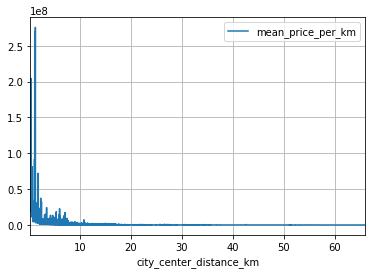

In [66]:
df_new.sort_values('city_center_distance_km').plot(x='city_center_distance_km', y='mean_price_per_km', grid=True)

В качестве центральной зоны используем значения не превышаюшие 3 км

#### Проанализируем центральную территорию: площадь, цена, число комнат, высота потолков, и выделим факторы, которые влияют на стоимость квартиры. Как итог сделаем вывод - отличаются ли факторы ценообразования в центре от всего остального города?

In [67]:
df_new = df_new.query('city_center_distance_km < 3')
df_new.sample(5)

,locality_name,rooms_number,last_price,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony_number,floor,floors_number_in_house,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,total_images,city_center_distance_m,parks_numbers_within_3km,park_nearest_distance_m,ponds_numbers_within_3km,pond_nearest_distance_m,airport_nearest_distance_m,price_per_m2,week_day,month,year,floor_category,total_living_ratio,total_kitchen_ratio,city_center_distance_km,mean_price_per_km
18260,санкт-петербург,3,9000000.0,94.0,50.00,15.98,2.65,0,3,5,True,False,False,2016-01-11,361.0,1,1828.0,0.0,NaN,2.0,53.0,21981.0,95744.68,Monday,January,2016,другой,0.531915,0.170000,1.828,4.923414e+06
2257,санкт-петербург,4,13300000.0,116.0,75.00,35.00,2.65,0,5,5,True,False,False,2017-07-21,146.0,8,1261.0,2.0,295.0,3.0,366.0,20170.0,114655.17,Friday,July,2017,последний,0.646552,0.301724,1.261,1.054718e+07
11380,санкт-петербург,3,8300000.0,92.0,51.52,15.64,2.65,0,2,5,True,False,False,2016-05-24,279.0,0,1917.0,2.0,205.0,1.0,730.0,22579.0,90217.39,Tuesday,May,2016,другой,0.560000,0.170000,1.917,4.329682e+06
18888,санкт-петербург,4,13000000.0,134.7,71.30,17.60,2.80,0,4,5,True,False,False,2016-05-31,NaN,11,1200.0,1.0,527.0,2.0,116.0,21643.0,96510.76,Tuesday,May,2016,другой,0.529324,0.130661,1.200,1.083333e+07
1268,санкт-петербург,2,5400000.0,46.0,28.00,7.50,2.65,0,1,5,True,False,False,2017-09-09,61.0,10,2043.0,2.0,377.0,1.0,411.0,21341.0,117391.30,Saturday,September,2017,первый,0.608696,0.163043,2.043,2.643172e+06


Средняя площадь: 82.2


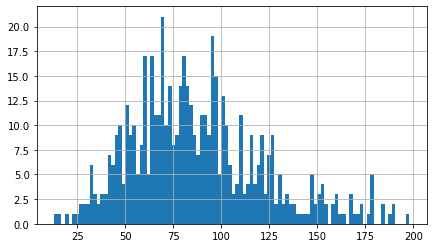

In [68]:
df_new.total_area_m2.hist(bins=100, figsize=(7,4))
print('Средняя площадь:', df_new.total_area_m2.median())

Распределение сместилось в правую сторону - средний размер квартиры стал больше

count    5.370000e+02
mean     1.361146e+07
std      2.127184e+07
min      2.100000e+06
25%      7.300000e+06
50%      9.500000e+06
75%      1.380000e+07
max      3.300000e+08
Name: last_price, dtype: float64
Минимальная цена: 2100000.0
Максимальная цена: 330000000.0
Средняя цена: 9500000.0


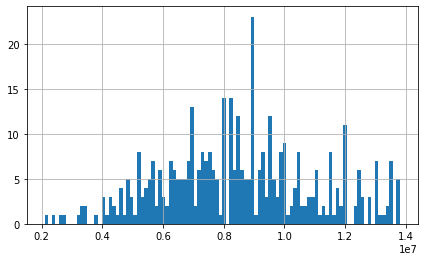

In [69]:
df_new.last_price.hist(bins=100, figsize=(7,4), range=(2100000, 13800000))
print(df_new.last_price.describe())
print('Минимальная цена:', df_new.last_price.min())
print('Максимальная цена:', df_new.last_price.max())
print('Средняя цена:', df_new.last_price.median())

Стоимость квартир явно выше плюс очень много выбросов - квартир, которые стоят очень больших денег. Впрочем, ничего удивительного.

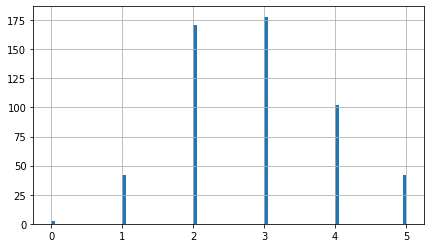

In [70]:
df_new.rooms_number.hist(bins=100, figsize=(7,4))

Значительно меньше однушек: данная зона представлена главным образом 2-3 комнатными квартирами. Сказывается огромное кол-во исторических зданий.

Минимальная высота: 2.5
Максимальная высота: 3.95
Средняя высота: 3.0


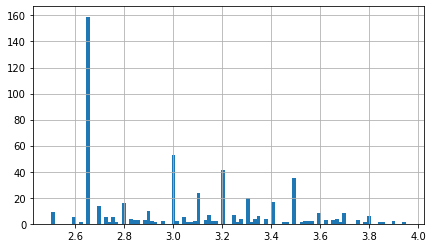

In [71]:
df_new.ceiling_height_m.hist(bins=100, figsize=(7,4))

print('Минимальная высота:', df_new.ceiling_height_m.min())
print('Максимальная высота:', df_new.ceiling_height_m.max())
print('Средняя высота:', df_new.ceiling_height_m.median())

Средняя высота потолков несколько выше, за счет большого кол-ва квартир, где показатель превышает 3 метра. Вероятнее всего, это связано с большим кол-вом "люксовых" квартир, расположенных в зоне. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ebe9abc90>,
      dtype=object)

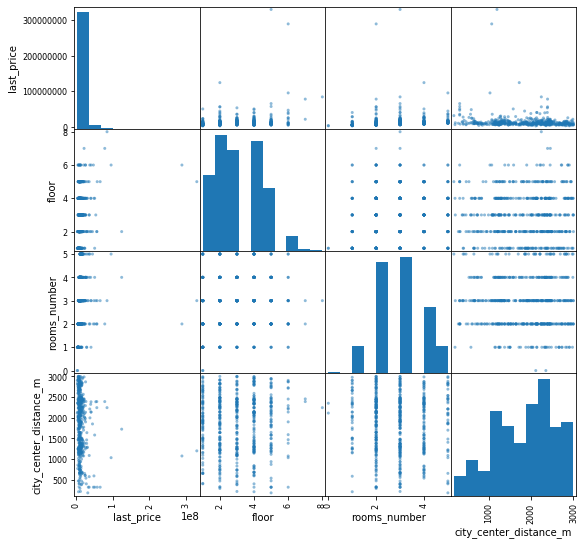

In [72]:
pd.plotting.scatter_matrix(df_new[['last_price', 'floor', 'rooms_number', 'city_center_distance_m']],
                           figsize=(9, 9))

Анализируя зависимость цены от числа комнат, этажа и удалённости от центра, можно отметить следующее:
- Главным образом квартиры расположены на 1-6 этаже. Их стоимость распределена достаточно равномерно вне зависимости от этаже.  На лицо отсутствие многоэтажек, которых много на окраинах.
- Касательно комнат: стоимость распределена также как и в общей выборке - ценовой пик за трехкомнатную квартиру и затем падение. Чем ближе к центру, тем дороже стоят квартиры, тогда как 4 и 5 комнатные, вероятнее всего, распологаются дальше от центра, где было больше возможности вместить новые здания с соответствующей планировкой.
- Параметр - расстояние от центра. В пределах нашей центральной зоны стоимость распределена равномерно, со своими выбросами, которые должны быть связаны с еще более памятными зданиями, чем остальные.

(0, 220000)

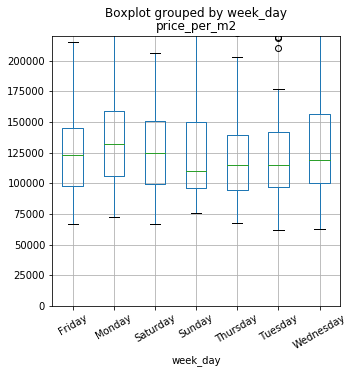

In [73]:
df_new.boxplot('price_per_m2', by='week_day', rot=30, figsize=(5,5)).set_ylim(0,220000)

(0, 220000)

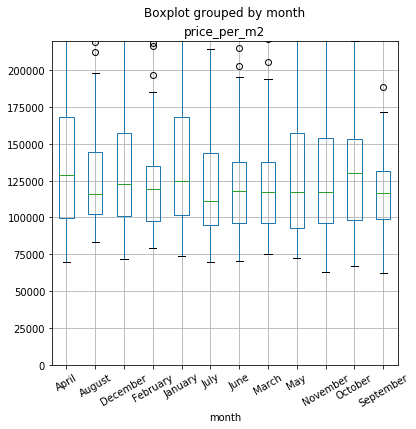

In [74]:
df_new.boxplot('price_per_m2', by='month', rot=30, figsize=(6,6)).set_ylim(0,220000)

(0, 200000)

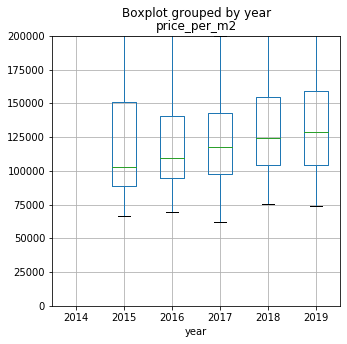

In [75]:
df_new.boxplot('price_per_m2', by='year', figsize=(5,5)).set_ylim(0,200000)

(0, 200000)

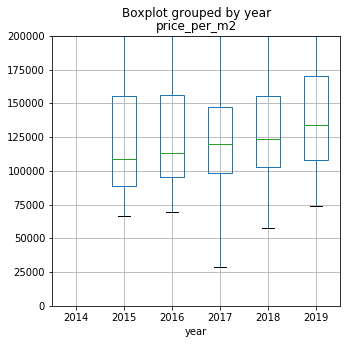

In [76]:
# проверим отсутствовали ли данные за 2014 год по этому сегменту в выборке до того как начали активно удалять данные

df_query_centr = df.query('city_center_distance_m < 3000')
df_query_centr.boxplot('price_per_m2', by='year', figsize=(5,5)).set_ylim(0,200000)

Недвижимость в центральной зоне могут позволить себе главным образом обеспеченные люди, которые не так сильно страдают во время кризисных ситуаций. Как минимум, у них больше шансов накопить основательные резервы в крепкой валюте и даже в некоторой степени увеличить свои финансовые возможности. Именно поэтому средняя стоимость квартир в данном сегменте устойчиво росла каждый год.

### Шаг 5. Общий вывод <a id='5-bullet'></a>

Выявлены следующие зависимости:
- С ростом площади квартиры ее стоимость увеличивается
- Стоимость квартир на первых и последних этажах гораздо ниже, чем в промежуточных. 
- Инфляция оказывает свое влияние на рост квартир: год от года они стоят дороже. Причем, если в целом по городу можно отметить некий застой цен в послекризисные годы, то в центральной зоне жилье продолжиро расти в цене.

За пределами Санкт-Петербурга жилье стоит дешевле. Стоимость квартир в туристическом городе Пушкино гораздо выше, чем в более близких к Санкт-Петербургу населенных пунктах, представленных типовыми многоэтажками. 

В центральной зоне здания гораздо ниже, чем в среднем по городу: чем ближе к центру, тем меньше объявлений о продаже можно обнаружить. Тем не менее, их стоимость гораздо выше, причем этаж уже не имеет существенного значения. Историческая застройка накладывает отепчаток на кол-во комнат: однушки и квартиры с 4 или большим числом комнат почти отсутствуют.